<a href="https://colab.research.google.com/github/smomtahe/ensemble-learning-absorption/blob/main/Classifier_Ensemble_Liquid_Phantom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# you can use github
%pip install git+https://github.com/tensorflow/docs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-e2gg_wvh
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/docs /tmp/pip-req-build-e2gg_wvh
  Resolved https://github.com/tensorflow/docs to commit a89b900f18bb647a8a5cba40997eacbe801c0fc0
  Preparing metadata (setup.py) ... done


In [ ]:
#importing the libraries
import numpy as np # for math and arrays
import pandas as pd # data from for the data.
import seaborn as sns # for plotting.
import statsmodels.api as sm

# for plotting
import matplotlib
import matplotlib.pyplot as plt # for plotting data and creating different charts.

# for the operating system operations e.g., creating a folder.
import os

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

%matplotlib inline
# Tensorflow and Keras are two packages for creating neural network models.
import tensorflow as tf
from tensorflow import keras

# import NN layers and other componenets.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers
from keras.optimizers import Adam

# Tensorflow untils packages.
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
import pathlib # for processing a path e.g., c:\documents\files\test_ds.csv

#upload data from my github
data = pd.read_csv("https://raw.githubusercontent.com/smomtahe/ai/main/DL_LP_new_new.csv")
data.head()

,intralipid,ink,minR1R2,690us,a690,label
0,72,0.0,4169,0.826553,0.000557,0.0
1,72,0.4,2419,0.918287,0.006333,1.0
2,72,0.8,1651,0.918101,0.009253,1.0
3,72,1.2,1312,0.917915,0.012172,1.0
4,72,1.6,1161,0.917729,0.015089,2.0


In [ ]:
'''
plt.figure(figsize=(10,5))

a = data['a690']
minR1R2 = data['minR1R2']

plt.plot(a[:8],minR1R2[:8],'b-o')
plt.plot(a[8:16],minR1R2[8:16],'g-o')
plt.plot(a[16:24],minR1R2[16:24],'y-o')
plt.plot(a[24:32],minR1R2[24:32],'m-o')
plt.plot(a[32:40],minR1R2[32:40],'r-o')

plt.ylabel('minimum reflectance (mm^-2) ',size=13),plt.xlabel('absorption coefficients (mm^-1)',size=13)
plt.legend(['72 mL', '90 mL','117 mL', '126 mL','144 mL'])
'''


"\nplt.figure(figsize=(10,5))\n\na = data['a690']\nminR1R2 = data['minR1R2']\n\nplt.plot(a[:8],minR1R2[:8],'b-o')\nplt.plot(a[8:16],minR1R2[8:16],'g-o')\nplt.plot(a[16:24],minR1R2[16:24],'y-o')\nplt.plot(a[24:32],minR1R2[24:32],'m-o')\nplt.plot(a[32:40],minR1R2[32:40],'r-o')\n\nplt.ylabel('minimum reflectance (mm^-2) ',size=13),plt.xlabel('absorption coefficients (mm^-1)',size=13)\nplt.legend(['72 mL', '90 mL','117 mL', '126 mL','144 mL'])\n"

0.006257341 0.009112927 0.01196738 0.014820701 0.017672891 0.02052395 0.023373879 0.000608636 0.006242608 0.00908566 0.011927588 0.014768395 0.01760808 0.020446644 0.023284088 0.000625373 0.006213528 0.009031837 0.011849044 0.014665147 0.017480149 0.020294049 0.023106848 0.003689807 0.00682175 0.009952423 0.013081828 0.016209964 0.019336833 0.022462435 0.00367913 0.006782757 0.009885138 0.012211106 0.012986273 0.016086162 0.019184806 0.022282207 0.023830441 0.006725573 0.012846135 0.018961848 0.022017888 0.012800252 0.003648227 0.006669899 0.009690389 0.012709697 0.015727825 0.018744773 0.021760542


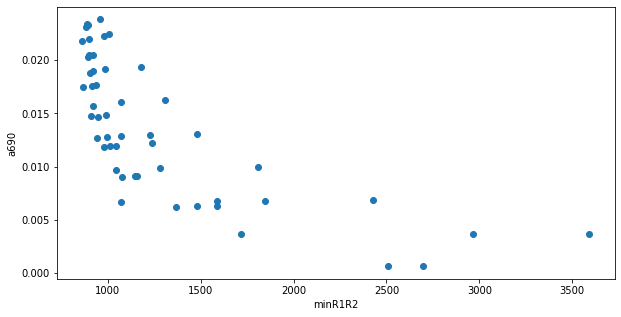

In [ ]:
plt.figure(figsize=(10,5))

X = data['minR1R2'].values
X = X.reshape((-1, 1))
x = X[17:]
Y = data['a690'].values
y = Y[17:]
#15 -> %25
x_test = X[:17]
y_test=Y[:17]
y_test=y_test.reshape((-1, 1))

#x, x_test, y, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100) #not good beacuse we need a test of various ua, not randomly distributed

plt.scatter(x,y)
plt.xlabel('minR1R2',size=10)
plt.ylabel('a690',size=10)
print(*y)

In [ ]:

# define a function to normalize the data set.

def norm(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))
x = norm(x)
y = norm(y)
x_test = norm(x_test)
y_test = norm(y_test)
print(*y_test)


[0.] [0.24814464] [0.37358097] [0.4989664] [0.62430101] [0.7495848] [0.87481777] [1.] [0.00075869] [0.24682719] [0.37114262] [0.49540808] [0.61962362] [0.74378925] [0.86790495] [0.99197083] [0.00187139]


Text(0, 0.5, 'a690')

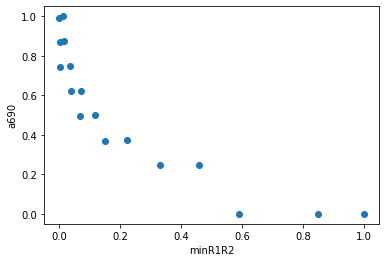

In [ ]:
plt.scatter(x_test,y_test)
plt.xlabel('minR1R2',size=10)
plt.ylabel('a690',size=10)

In [ ]:
# install boosting
!pip install catboost
!pip install xgboost
!pip install lightgbm


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, VotingRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor

import numpy as np

# Define base estimators
base1 = SVR(kernel='rbf')
base2 = RandomForestRegressor(n_estimators=100, max_depth=10, max_features='sqrt', random_state=42)
base3 = KNeighborsRegressor(n_neighbors=3)
base4 = DecisionTreeRegressor(max_depth=5)
base5 = MLPRegressor(hidden_layer_sizes=(64, 32,16), activation='relu', solver='adam', max_iter=1000, alpha=0.1)
base6 = make_pipeline(PolynomialFeatures(degree=4), KNeighborsRegressor())
base7 = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
base8 = CatBoostRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42, verbose=0)
base9 = ExtraTreesRegressor(n_estimators=100, max_depth=5, random_state=42)

# Define ensemble models
ensemble1 = BaggingRegressor(base_estimator=base1, n_estimators=10, random_state=42)
ensemble2 = AdaBoostRegressor(base_estimator=base2, n_estimators=10, random_state=42)
ensemble3 = BaggingRegressor(base_estimator=base3, n_estimators=10, random_state=42)
ensemble4 = AdaBoostRegressor(base_estimator=base4, n_estimators=10, random_state=42)
ensemble5 = BaggingRegressor(base_estimator=base5, n_estimators=10, random_state=42)
ensemble6 = AdaBoostRegressor(base_estimator=base6, n_estimators=10, random_state=42)
ensemble7 = GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
ensemble8 = VotingRegressor([('svr', base1), ('rf', base2), ('knn', base3), ('dt', base4), ('mlp', base5), ('polyknn', base6), ('xgb', base7), ('catboost', base8)])
ensemble9 = BaggingRegressor(base_estimator=base9, n_estimators=10, random_state=42)

# Fit models on training data
ensemble1.fit(x, y)
ensemble2.fit(x, y)
ensemble3.fit(x, y)
ensemble4.fit(x, y)
ensemble5.fit(x, y)
ensemble6.fit(x, y)
ensemble7.fit(x, y)
ensemble8.fit(x, y)
ensemble9.fit(x, y)

# Make predictions on test data
y_pred1 = ensemble1.predict(x_test)
y_pred2 = ensemble2.predict(x_test)
y_pred3 = ensemble3.predict(x_test)
y_pred4 = ensemble4.predict(x_test)
y_pred5 = ensemble5.predict(x_test)
y_pred6 = ensemble6.predict(x_test)
y_pred7 = ensemble7.predict(x_test)
y_pred8 = ensemble8.predict(x_test)
y_pred9 = ensemble9.predict(x_test)

# Compute mean squared error
mse1 = mean_squared_error(y_test, y_pred1)
mse2 = mean_squared_error(y_test, y_pred2)
mse3 = mean_squared_error(y_test, y_pred3)
mse4 = mean_squared_error(y_test, y_pred4)
mse5 = mean_squared_error(y_test, y_pred5)
mse6 = mean_squared_error(y_test, y_pred6)
mse7 = mean_squared_error(y_test, y_pred7)
mse8 = mean_squared_error(y_test, y_pred8)
mse9 = mean_squared_error(y_test, y_pred9)

print("MSE for ensemble 1:", mse1)
print("MSE for ensemble 2:", mse2)
print("MSE for ensemble 3:", mse3)
print("MSE for ensemble 4:", mse4)
print("MSE for ensemble 5:", mse5)
print("MSE for ensemble 6:", mse6)
print("MSE for ensemble 7:", mse7)
print("MSE for ensemble 8:", mse8)
print("MSE for ensemble 9:", mse9)

r2_1 = r2_score(y_test, y_pred1)
r2_2 = r2_score(y_test, y_pred2)
r2_3 = r2_score(y_test, y_pred3)
r2_4 = r2_score(y_test, y_pred4)
r2_5 = r2_score(y_test, y_pred5)
r2_6 = r2_score(y_test, y_pred6)
r2_7 = r2_score(y_test, y_pred7)
r2_8 = r2_score(y_test, y_pred8)
r2_9 = r2_score(y_test, y_pred9)

# Print results
print('Bagging ensemble with SVR R-squared score: %.2f' % r2_1)
print('Boosting ensemble with Random Forest Regressor R-squared score: %.2f' % r2_2)
print('Bagging ensemble with KNN Regressor R-squared score: %.2f' % r2_3)
print('Boosting ensemble with Decision Tree Regressor R-squared score: %.2f' % r2_4)
print('Bagging ensemble with MLP RegressorR-squared score: %.2f' % r2_5)
print('Boosting ensemble with Polynomial Regressor R-squared score: %.2f' % r2_6)
print('Bagging ensemble with CatBoostRegressor R-squared score: %.2f' % r2_7)
print('Boosting ensemble with XGBRegressor R-squared score: %.2f' % r2_8)
print('Bagging ensemble with Extra Trees Regressor R-squared score: %.2f' % r2_9)



[18:22:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MSE for ensemble 1: 0.015389559242600204
MSE for ensemble 2: 0.017585991406999214
MSE for ensemble 3: 0.008881337861692934
MSE for ensemble 4: 0.026292446213939554
MSE for ensemble 5: 0.01737986752054931
MSE for ensemble 6: 0.01111137996304502
MSE for ensemble 7: 0.02821433292132878
MSE for ensemble 8: 0.009377475732928454
MSE for ensemble 9: 0.007989050727191024
Bagging ensemble with SVR R-squared score: 0.86
Boosting ensemble with Random Forest Regressor R-squared score: 0.84
Bagging ensemble with KNN Regressor R-squared score: 0.92
Boosting ensemble with Decision Tree Regressor R-squared score: 0.75
Bagging ensemble with MLP RegressorR-squared score: 0.84
Boosting ensemble with Polynomial Regressor R-squared score: 0.90
Bagging ensemble with CatBoostRegressor R-squared score: 0.74
Boosting ensemble with XGBRegressor R-squared score: 0.91
Bagging ensemble wit

In [ ]:
y_ensemble1 = norm(y_pred1)
y_ensemble2 = norm(y_pred2)
y_ensemble3 = norm(y_pred3)
y_ensemble4 = norm(y_pred4)
y_ensemble5 = norm(y_pred5)
y_ensemble6 = norm(y_pred6)
y_ensemble7 = norm(y_pred7)
y_ensemble8 = norm(y_pred8)
y_ensemble9 = norm(y_pred9)

In [ ]:
# make class predictions with 4 best models
predictions3 = (y_ensemble3 > 0.55).astype(int)
print(*predictions3)
predictions6 = (y_ensemble6 > 0.55).astype(int)
print(*predictions6)
predictions8 = (y_ensemble8 > 0.55).astype(int)
print(*predictions8)
predictions9 = (y_ensemble9 > 0.55).astype(int)
print(*predictions9)

0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0
0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 1 0
0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0
0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0


In [ ]:
y_test_type= (y_test > 0.5).astype(int)
print(*y_test_type)

[0] [0] [0] [0] [1] [1] [1] [1] [0] [0] [0] [0] [1] [1] [1] [1] [0]


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_type,predictions3))
from sklearn.metrics import plot_confusion_matrix

import sklearn.metrics
import math
def matrix_metrix(y_test,test_predictions,beta):
   CM = confusion_matrix(y_test_type,predictions3)
   TN = CM[0][0]
   FN = CM[1][0]
   TP = CM[1][1]
   FP = CM[0][1]
   MSE = mean_squared_error(y_test_type,predictions3)
   RMSE = np.sqrt(mean_squared_error(y_test_type,predictions3))
   Population = TN+FN+TP+FP
   Prevalence = round( (TP+FP) / Population,2)
   Accuracy   = round( (TP+TN) / Population,4)
   Sensitivity   = ( TP / (TP+FN))
   Specificity   = ( TN / (TN+FP))
   Precision  = round( TP / (TP+FP),4 )
   NPV        = round( TN / (TN+FN),4 )
   FDR        = round( FP / (TP+FP),4 )
   FOR        = round( FN / (TN+FN),4 )
   check_Pos  = Precision + FDR
   check_Neg  = NPV + FOR
   Recall     = round( TP / (TP+FN),4 )
   FPR        = round( FP / (TN+FP),4 )
   FNR        = round( FN / (TP+FN),4 )
   TNR        = round( TN / (TN+FP),4 )
   check_Pos2 = Recall + FNR
   check_Neg2 = FPR + TNR
   LRPos      = round( Recall/FPR,4 )
   LRNeg      = round( FNR / TNR ,4 )
   F1         = round ( 2 * ((Precision*Recall)/(Precision+Recall)),4)
   FBeta      = round ( (1+beta**2)*((Precision*Recall)/((beta**2 * Precision)+ Recall)) ,4)
   MCC        = round ( ((TP*TN)-(FP*FN))/math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))  ,4)
   BM         = Recall+TNR-1
   MK         = Precision+NPV-1
   mat_met = pd.DataFrame({
'Metric':['TP','TN','FP','FN','MSE','RMSE','Prevalence','Accuracy','Sensitivity','Specificity','Precision','NPV','FDR','FOR','check_Pos','check_Neg','Recall','FPR','FNR','TNR','check_Pos2','check_Neg2','LR+','LR-','F1','FBeta','MCC','BM','MK'],     'Value':[TP,TN,FP,FN,MSE,RMSE,Prevalence,Accuracy,Sensitivity,Specificity,Precision,NPV,FDR,FOR,check_Pos,check_Neg,Recall,FPR,FNR,TNR,check_Pos2,check_Neg2,LRPos,LRNeg,F1,FBeta,MCC,BM,MK]})
   return (mat_met)
beta = 0.4
mat_met = matrix_metrix(y_test_type,predictions3,beta)
print (mat_met)

[[9 0]
 [0 8]]
         Metric  Value
0            TP   8.00
1            TN   9.00
2            FP   0.00
3            FN   0.00
4           MSE   0.00
5          RMSE   0.00
6    Prevalence   0.47
7      Accuracy   1.00
8   Sensitivity   1.00
9   Specificity   1.00
10    Precision   1.00
11          NPV   1.00
12          FDR   0.00
13          FOR   0.00
14    check_Pos   1.00
15    check_Neg   1.00
16       Recall   1.00
17          FPR   0.00
18          FNR   0.00
19          TNR   1.00
20   check_Pos2   1.00
21   check_Neg2   1.00
22          LR+    inf
23          LR-   0.00
24           F1   1.00
25        FBeta   1.00
26          MCC   1.00
27           BM   1.00
28           MK   1.00


<ipython-input-48-1e8b06133a90>:32: RuntimeWarning: divide by zero encountered in double_scalars
  LRPos      = round( Recall/FPR,4 )


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_type,predictions6))
from sklearn.metrics import plot_confusion_matrix

import sklearn.metrics
import math
def matrix_metrix(y_test,test_predictions,beta):
   CM = confusion_matrix(y_test_type,predictions6)
   TN = CM[0][0]
   FN = CM[1][0]
   TP = CM[1][1]
   FP = CM[0][1]
   MSE = mean_squared_error(y_test_type,predictions6)
   RMSE = np.sqrt(mean_squared_error(y_test_type,predictions6))
   Population = TN+FN+TP+FP
   Prevalence = round( (TP+FP) / Population,2)
   Accuracy   = round( (TP+TN) / Population,4)
   Sensitivity   = ( TP / (TP+FN))
   Specificity   = ( TN / (TN+FP))
   Precision  = round( TP / (TP+FP),4 )
   NPV        = round( TN / (TN+FN),4 )
   FDR        = round( FP / (TP+FP),4 )
   FOR        = round( FN / (TN+FN),4 )
   check_Pos  = Precision + FDR
   check_Neg  = NPV + FOR
   Recall     = round( TP / (TP+FN),4 )
   FPR        = round( FP / (TN+FP),4 )
   FNR        = round( FN / (TP+FN),4 )
   TNR        = round( TN / (TN+FP),4 )
   check_Pos2 = Recall + FNR
   check_Neg2 = FPR + TNR
   LRPos      = round( Recall/FPR,4 )
   LRNeg      = round( FNR / TNR ,4 )
   F1         = round ( 2 * ((Precision*Recall)/(Precision+Recall)),4)
   FBeta      = round ( (1+beta**2)*((Precision*Recall)/((beta**2 * Precision)+ Recall)) ,4)
   MCC        = round ( ((TP*TN)-(FP*FN))/math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))  ,4)
   BM         = Recall+TNR-1
   MK         = Precision+NPV-1
   mat_met = pd.DataFrame({
'Metric':['TP','TN','FP','FN','MSE','RMSE','Prevalence','Accuracy','Sensitivity','Specificity','Precision','NPV','FDR','FOR','check_Pos','check_Neg','Recall','FPR','FNR','TNR','check_Pos2','check_Neg2','LR+','LR-','F1','FBeta','MCC','BM','MK'],     'Value':[TP,TN,FP,FN,MSE,RMSE,Prevalence,Accuracy,Sensitivity,Specificity,Precision,NPV,FDR,FOR,check_Pos,check_Neg,Recall,FPR,FNR,TNR,check_Pos2,check_Neg2,LRPos,LRNeg,F1,FBeta,MCC,BM,MK]})
   return (mat_met)
beta = 0.4
mat_met = matrix_metrix(y_test_type,predictions6,beta)
y_test_type = (y_test > 0.5).astype(int)
print(*y_test_type)
print (mat_met)

[[9 0]
 [1 7]]
[0] [0] [0] [0] [1] [1] [1] [1] [0] [0] [0] [0] [1] [1] [1] [1] [0]
         Metric     Value
0            TP  7.000000
1            TN  9.000000
2            FP  0.000000
3            FN  1.000000
4           MSE  0.058824
5          RMSE  0.242536
6    Prevalence  0.410000
7      Accuracy  0.941200
8   Sensitivity  0.875000
9   Specificity  1.000000
10    Precision  1.000000
11          NPV  0.900000
12          FDR  0.000000
13          FOR  0.100000
14    check_Pos  1.000000
15    check_Neg  1.000000
16       Recall  0.875000
17          FPR  0.000000
18          FNR  0.125000
19          TNR  1.000000
20   check_Pos2  1.000000
21   check_Neg2  1.000000
22          LR+       inf
23          LR-  0.125000
24           F1  0.933300
25        FBeta  0.980700
26          MCC  0.887400
27           BM  0.875000
28           MK  0.900000


<ipython-input-49-0b72d1233c50>:32: RuntimeWarning: divide by zero encountered in double_scalars
  LRPos      = round( Recall/FPR,4 )


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_type,predictions8))
from sklearn.metrics import plot_confusion_matrix

import sklearn.metrics
import math
def matrix_metrix(y_test,test_predictions,beta):
   CM = confusion_matrix(y_test_type,predictions8)
   TN = CM[0][0]
   FN = CM[1][0]
   TP = CM[1][1]
   FP = CM[0][1]
   MSE = mean_squared_error(y_test_type,predictions8)
   RMSE = np.sqrt(mean_squared_error(y_test_type,predictions8))
   Population = TN+FN+TP+FP
   Prevalence = round( (TP+FP) / Population,2)
   Accuracy   = round( (TP+TN) / Population,4)
   Sensitivity   = ( TP / (TP+FN))
   Specificity   = ( TN / (TN+FP))
   Precision  = round( TP / (TP+FP),4 )
   NPV        = round( TN / (TN+FN),4 )
   FDR        = round( FP / (TP+FP),4 )
   FOR        = round( FN / (TN+FN),4 )
   check_Pos  = Precision + FDR
   check_Neg  = NPV + FOR
   Recall     = round( TP / (TP+FN),4 )
   FPR        = round( FP / (TN+FP),4 )
   FNR        = round( FN / (TP+FN),4 )
   TNR        = round( TN / (TN+FP),4 )
   check_Pos2 = Recall + FNR
   check_Neg2 = FPR + TNR
   LRPos      = round( Recall/FPR,4 )
   LRNeg      = round( FNR / TNR ,4 )
   F1         = round ( 2 * ((Precision*Recall)/(Precision+Recall)),4)
   FBeta      = round ( (1+beta**2)*((Precision*Recall)/((beta**2 * Precision)+ Recall)) ,4)
   MCC        = round ( ((TP*TN)-(FP*FN))/math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))  ,4)
   BM         = Recall+TNR-1
   MK         = Precision+NPV-1
   mat_met = pd.DataFrame({
'Metric':['TP','TN','FP','FN','MSE','RMSE','Prevalence','Accuracy','Sensitivity','Specificity','Precision','NPV','FDR','FOR','check_Pos','check_Neg','Recall','FPR','FNR','TNR','check_Pos2','check_Neg2','LR+','LR-','F1','FBeta','MCC','BM','MK'],     'Value':[TP,TN,FP,FN,MSE,RMSE,Prevalence,Accuracy,Sensitivity,Specificity,Precision,NPV,FDR,FOR,check_Pos,check_Neg,Recall,FPR,FNR,TNR,check_Pos2,check_Neg2,LRPos,LRNeg,F1,FBeta,MCC,BM,MK]})
   return (mat_met)
beta = 0.4
mat_met = matrix_metrix(y_test_type,predictions8,beta)
y_test_type = (y_test > 0.5).astype(int)
print(*y_test_type)
print (mat_met)

[[7 2]
 [0 8]]
[0] [0] [0] [0] [1] [1] [1] [1] [0] [0] [0] [0] [1] [1] [1] [1] [0]
         Metric     Value
0            TP  8.000000
1            TN  7.000000
2            FP  2.000000
3            FN  0.000000
4           MSE  0.117647
5          RMSE  0.342997
6    Prevalence  0.590000
7      Accuracy  0.882400
8   Sensitivity  1.000000
9   Specificity  0.777778
10    Precision  0.800000
11          NPV  1.000000
12          FDR  0.200000
13          FOR  0.000000
14    check_Pos  1.000000
15    check_Neg  1.000000
16       Recall  1.000000
17          FPR  0.222200
18          FNR  0.000000
19          TNR  0.777800
20   check_Pos2  1.000000
21   check_Neg2  1.000000
22          LR+  4.500500
23          LR-  0.000000
24           F1  0.888900
25        FBeta  0.822700
26          MCC  0.788800
27           BM  0.777800
28           MK  0.800000


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_type,predictions9))
from sklearn.metrics import plot_confusion_matrix

import sklearn.metrics
import math
def matrix_metrix(y_test,test_predictions,beta):
   CM = confusion_matrix(y_test_type,predictions9)
   TN = CM[0][0]
   FN = CM[1][0]
   TP = CM[1][1]
   FP = CM[0][1]
   MSE = mean_squared_error(y_test_type,predictions9)
   RMSE = np.sqrt(mean_squared_error(y_test_type,predictions9))
   Population = TN+FN+TP+FP
   Prevalence = round( (TP+FP) / Population,2)
   Accuracy   = round( (TP+TN) / Population,4)
   Sensitivity   = ( TP / (TP+FN))
   Specificity   = ( TN / (TN+FP))
   Precision  = round( TP / (TP+FP),4 )
   NPV        = round( TN / (TN+FN),4 )
   FDR        = round( FP / (TP+FP),4 )
   FOR        = round( FN / (TN+FN),4 )
   check_Pos  = Precision + FDR
   check_Neg  = NPV + FOR
   Recall     = round( TP / (TP+FN),4 )
   FPR        = round( FP / (TN+FP),4 )
   FNR        = round( FN / (TP+FN),4 )
   TNR        = round( TN / (TN+FP),4 )
   check_Pos2 = Recall + FNR
   check_Neg2 = FPR + TNR
   LRPos      = round( Recall/FPR,4 )
   LRNeg      = round( FNR / TNR ,4 )
   F1         = round ( 2 * ((Precision*Recall)/(Precision+Recall)),4)
   FBeta      = round ( (1+beta**2)*((Precision*Recall)/((beta**2 * Precision)+ Recall)) ,4)
   MCC        = round ( ((TP*TN)-(FP*FN))/math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))  ,4)
   BM         = Recall+TNR-1
   MK         = Precision+NPV-1
   mat_met = pd.DataFrame({
'Metric':['TP','TN','FP','FN','MSE','RMSE','Prevalence','Accuracy','Sensitivity','Specificity','Precision','NPV','FDR','FOR','check_Pos','check_Neg','Recall','FPR','FNR','TNR','check_Pos2','check_Neg2','LR+','LR-','F1','FBeta','MCC','BM','MK'],     'Value':[TP,TN,FP,FN,MSE,RMSE,Prevalence,Accuracy,Sensitivity,Specificity,Precision,NPV,FDR,FOR,check_Pos,check_Neg,Recall,FPR,FNR,TNR,check_Pos2,check_Neg2,LRPos,LRNeg,F1,FBeta,MCC,BM,MK]})
   return (mat_met)
beta = 0.4
mat_met = matrix_metrix(y_test_type,predictions9,beta)
y_test_type = (y_test > 0.5).astype(int)
print(*y_test_type)
print (mat_met)

[[7 2]
 [0 8]]
[0] [0] [0] [0] [1] [1] [1] [1] [0] [0] [0] [0] [1] [1] [1] [1] [0]
         Metric     Value
0            TP  8.000000
1            TN  7.000000
2            FP  2.000000
3            FN  0.000000
4           MSE  0.117647
5          RMSE  0.342997
6    Prevalence  0.590000
7      Accuracy  0.882400
8   Sensitivity  1.000000
9   Specificity  0.777778
10    Precision  0.800000
11          NPV  1.000000
12          FDR  0.200000
13          FOR  0.000000
14    check_Pos  1.000000
15    check_Neg  1.000000
16       Recall  1.000000
17          FPR  0.222200
18          FNR  0.000000
19          TNR  0.777800
20   check_Pos2  1.000000
21   check_Neg2  1.000000
22          LR+  4.500500
23          LR-  0.000000
24           F1  0.888900
25        FBeta  0.822700
26          MCC  0.788800
27           BM  0.777800
28           MK  0.800000
